<h2 style="font-size: 30px;">Machine Learning Project on Students' Adaptability to Online Education</h2>

<h3 style="font-size: 25px;">Introduction</h2>

The aim of this project is to identify the best machine learning model for predicting students' adaptability levels to online education. The dataset contains information about the students, including whether their adaptability level to online education is low, moderate, or high. The machine learning model is designed to predict the adaptability level based on other information provided by the students.

Since there are three possible adaptability levels, the classification method used is multinomial logistic regression. Logistic regression is used for predicting class labels, and "multinomial" indicates that there are more than two classes.

For implementation, I will use pre-built functions from Pandas, NumPy, and Sklearn, and for visualizations, I will utilize Matplotlib and Seaborn. The documentation for these libraries will be referenced as needed.

The dataset is sourced from Kaggle: Students’ Adaptability Level in Online Education Dataset.

Reference to the original research paper:
Hasan Suzan, M., Samrin, N. A., Biswas, A. A., and Pramanik, A. (2021). Students’ Adaptability Level Prediction in Online Education Using Machine Learning Approaches. IEEE Xplore. Accessed 16.11.2024.

As this is my own project, aimed at practicing machine learning, I will be doing everything in this notebook—code, interpretations, etc.—as I find it more convenient not to do them separately. This kind of layout might be easier to understand for the reader. 

Notes to reader
<ul>
<li> I have used both the terms 'group' and 'class' for the labels to predict ('Low', 'Moderate', 'High'), so they refer to the same thing in this project.
</ul>

In [37]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  #data visualization library
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix  # evaluation metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, log_loss

<h3 style="font-size: 25px;">Data preparation</h3>

Read the file containing the data 

In [38]:
data = pd.read_csv("adaptability_level_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


<h3 style="font-size: 20px;">Visualize some features</h3>

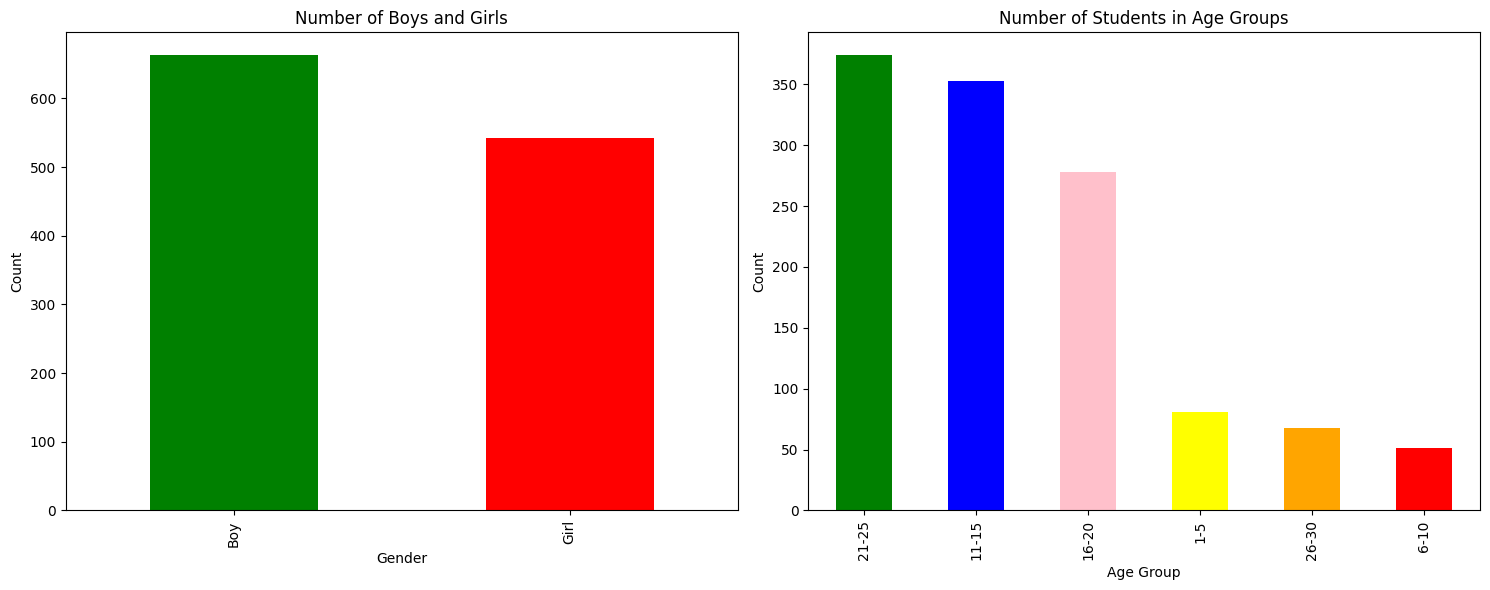

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
data['Gender'].value_counts().plot(kind='bar', color=['green', 'red'], ax=axes[0])
axes[0].set_title('Number of Boys and Girls')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

data['Age'].value_counts().plot(kind='bar', color=['green', 'blue', 'pink', 'yellow', 'orange', 'red'], ax=axes[1])
axes[1].set_title('Number of Students in Age Groups')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')


plt.tight_layout()
plt.show()

The data contains 1205 lines, with each line representing the information of one student. It includes 13 features (numbered 0-12) and one label, "Adaptivity Level" (number 13). These features are designed to assign the correct label to a student based on their characteristics (features) using a machine learning model. All data points are non-numerical, which means they need to be converted into numerical form.

First, convert the data type of each feature to a string so that it is easier to process.

In [40]:
for column_name in data.columns:
    data[column_name] = data[column_name].astype(str)
print(data.head)

<bound method NDFrame.head of      Gender    Age Education Level Institution Type IT Student Location  \
0       Boy  21-25      University   Non Government         No      Yes   
1      Girl  21-25      University   Non Government         No      Yes   
2      Girl  16-20         College       Government         No      Yes   
3      Girl  11-15          School   Non Government         No      Yes   
4      Girl  16-20          School   Non Government         No      Yes   
...     ...    ...             ...              ...        ...      ...   
1200   Girl  16-20         College   Non Government         No      Yes   
1201   Girl  16-20         College   Non Government         No       No   
1202    Boy  11-15          School   Non Government         No      Yes   
1203   Girl  16-20         College   Non Government         No       No   
1204   Girl  11-15          School   Non Government         No      Yes   

     Load-shedding Financial Condition Internet Type Network Type  \


Drop students in the age group 1-5, as they are too young to be considered proper students.

In [41]:
data = data[data["Age"] != '1-5']
print(f"Number of data points: {data["Age"].size}.")

Number of data points: 1124.


Identify all possible values for each feature and convert them into numerical format. In this case, the features are all values of the columns except for Adaptivity Level, which is the label.

In [42]:
for column_name in data.columns:
    print(column_name)
    print(data[column_name].unique())
    print()

Gender
['Boy' 'Girl']

Age
['21-25' '16-20' '11-15' '26-30' '6-10']

Education Level
['University' 'College' 'School']

Institution Type
['Non Government' 'Government']

IT Student
['No' 'Yes']

Location
['Yes' 'No']

Load-shedding
['Low' 'High']

Financial Condition
['Mid' 'Poor' 'Rich']

Internet Type
['Wifi' 'Mobile Data']

Network Type
['4G' '3G' '2G']

Class Duration
['3-6' '1-3' '0']

Self Lms
['No' 'Yes']

Device
['Tab' 'Mobile' 'Computer']

Adaptivity Level
['Moderate' 'Low' 'High']



Convert the data points into numerical values.

In [43]:
data['Gender'] = data['Gender'].map({'Boy': 0, 'Girl': 1})
data['Age'] = data['Age'].map({'6-10': 0, '11-15': 1, '16-20': 2, '21-25': 3, '26-30': 4})
data['Education Level'] = data['Education Level'].map({'School': 0, 'College': 1, 'University': 2})
data['Institution Type'] = data['Institution Type'].map({'Non Government': 0, 'Government': 1})
data['IT Student'] = data['IT Student'].map({'No': 0, 'Yes': 1})
data['Location'] = data['Location'].map({'No': 0, 'Yes': 1})
data['Load-shedding'] = data['Load-shedding'].map({'Low': 0, 'High': 1})
data['Financial Condition'] = data['Financial Condition'].map({'Poor': 0, 'Mid': 1, 'Rich': 2})
data['Internet Type'] = data['Internet Type'].map({'Wifi': 0, 'Mobile Data': 1})
data['Network Type'] = data['Network Type'].map({'2G': 0, '3G': 1, '4G': 2})
data['Class Duration'] = data['Class Duration'].map({'0': 0, '1-3': 1, '3-6': 2})
data['Self Lms'] = data['Self Lms'].map({'No': 0, 'Yes': 1})
data['Device'] = data['Device'].map({'Mobile': 0, 'Tab': 1, 'Computer': 2})

print(data.head)

<bound method NDFrame.head of       Gender  Age  Education Level  Institution Type  IT Student  Location  \
0          0    3                2                 0           0         1   
1          1    3                2                 0           0         1   
2          1    2                1                 1           0         1   
3          1    1                0                 0           0         1   
4          1    2                0                 0           0         1   
...      ...  ...              ...               ...         ...       ...   
1200       1    2                1                 0           0         1   
1201       1    2                1                 0           0         0   
1202       0    1                0                 0           0         1   
1203       1    2                1                 0           0         0   
1204       1    1                0                 0           0         1   

      Load-shedding  Financial Co

Find all possible label values.

In [44]:
print(data['Adaptivity Level'].unique())

['Moderate' 'Low' 'High']


Create a data frame without labels and scale the feature values using method StandardScaler to make them approximately normally distributed with average 0.

In [45]:
X_multi = data.drop(columns=['Adaptivity Level'])
feature_names = X_multi.columns
multi_labels = ['Low', 'Moderate', 'High']     # correct order of labels, which is used in plottig confusion matrix

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_multi)
scaled_data_frame = pd.DataFrame(scaled_data, columns = feature_names)
print("The data after scaling")
scaled_data_frame.head()

The data after scaling


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device
0,-0.855509,0.920340,1.107532,-0.708995,-0.608877,0.558168,-0.466656,0.223311,-1.123196,0.763558,1.675460,-0.475117,0.964949
1,1.168895,0.920340,1.107532,-0.708995,-0.608877,0.558168,2.142905,0.223311,0.890317,0.763558,-0.094481,2.104745,-0.443626
2,1.168895,-0.047351,-0.006941,1.410447,-0.608877,0.558168,-0.466656,0.223311,-1.123196,0.763558,-0.094481,-0.475117,-0.443626
3,1.168895,-1.015042,-1.121413,-0.708995,-0.608877,0.558168,-0.466656,0.223311,0.890317,0.763558,-0.094481,-0.475117,-0.443626
4,1.168895,-0.047351,-1.121413,-0.708995,-0.608877,0.558168,-0.466656,-1.800893,0.890317,-1.147888,-1.864421,-0.475117,-0.443626


<h3 style="font-size: 20px;">Data sets</h3>

Divide data randomly into training data (80%), validation data (10%) and test data (10%). Using a large training set is common when the dataset is relatively small. Training data is used to train the machine learning model, validation data is used to assess the model's performance, and test data is used for final evaluation of the model.

In [46]:
X_train, X_val, y_train, y_val = train_test_split(scaled_data_frame, data['Adaptivity Level'], test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

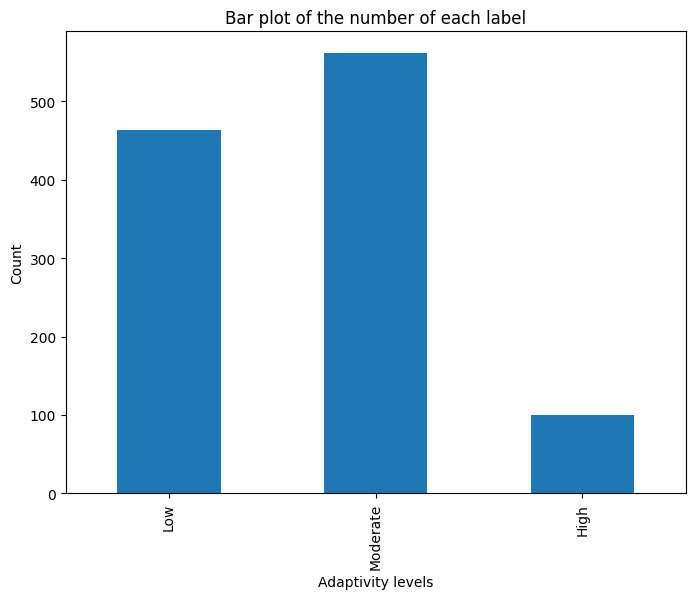

In [47]:
plt.figure(figsize=(8, 6))
# sort the data
data['Adaptivity Level'] = pd.Categorical(data['Adaptivity Level'], categories=multi_labels, ordered=True)
# create plot of sorted data
data['Adaptivity Level'].value_counts(sort=False).reindex(multi_labels).plot(kind='bar')

plt.xlabel("Adaptivity levels")
plt.ylabel("Count")
plt.title("Bar plot of the number of each label")
plt.show()

<h3 style="font-size: 25px;">Feature engineering</h3>

Next, principal component analysis is performed to identify any non-significant features. The aim is to reduce the dimensionality (number of features) of the model, making it simpler while retaining as much information as possible.

The scree plot below shows the principal components, with the first component explaining the most variance, followed by the others in descending order. The PCA function tries to place as much information as possible in the components on the left. If components on the left are highly correlated with those on the right, the latter will explain very little variance and should be considered for removal. 


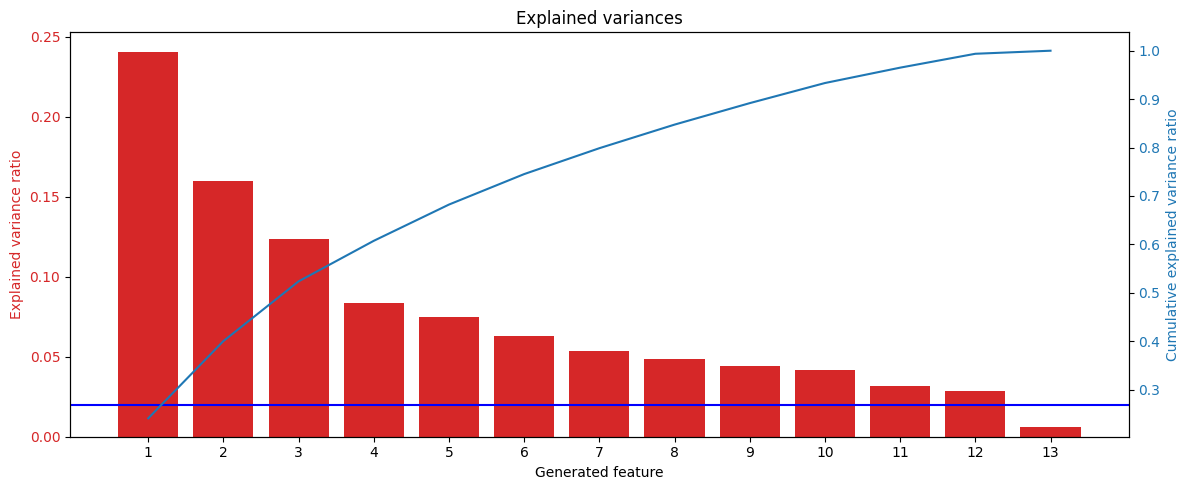

In [48]:
# use all features the training data
N = len(X_train.columns)
pca = PCA(n_components=N)
X_train_reduced = pca.fit_transform(X_train)

# scree plot
fig, ax1 = plt.subplots(figsize=(12, 5))
color = 'tab:red'
ax1.bar(1+np.arange(N), pca.explained_variance_ratio_, color=color)
ax1.set_xticks(1+np.arange(N))
ax1.tick_params(axis='y', labelcolor=color)
plt.title("Explained variances")
ax1.set_ylabel("Explained variance ratio", color=color)
ax1.set_xlabel("Generated feature")

# a line indicating an explained variance ratio below 2%
plt.axhline(y = 0.02, color = 'b', linestyle = '-')

# plot cumulative explained variance ratio
# indicates how much information is retained when including the corresponding feature in the model
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(1+np.arange(N), np.cumsum(pca.explained_variance_ratio_), color=color)
ax2.set_ylabel("Cumulative explained variance ratio", color=color)

fig.tight_layout()
plt.show()

Features with an explained variance ratio under 2% will be removed, meaning one feature. As can be seen from the plot, removing feature 13 will not significantly decrease the cumulative explained variance ratio. Next, remove one feature from all datasets.

In [49]:
N = 12
pca = PCA(n_components=N)
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.fit_transform(X_val)
X_test_reduced = pca.fit_transform(X_test)


<h3 style="font-size: 25px;">Model engineering</h3>

Now, it's time to determine the best model for this machine learning problem. Three models will be tested: multinomial logistic regression, a decision tree, and k-nearest neighbors. The accuracy_score function from Scikit-learn will be used to calculate the accuracy of each model, and cross-entropy loss will be used to compute the loss function.

The model and its parameters (focusing only on the most significant ones) will be selected based on the results of both the loss function and the accuracy score, ensuring that the chosen model performs well across both metrics.

<h3 style="font-size: 20px;">Accuracy scores</h3>

In this context, accuracy refers to the proportion of predictions made by the model that match the correct labels in the dataset. The accuracy score will be computed for both the training and validation datasets. Ideally, these scores should not differ significantly. However, it is expected that the training data will show slightly higher accuracy since it is used to fit the model.

While accuracy alone cannot provide definitive insights due to the influence of group size imbalances, it will still be used as an initial metric. This is because it is straightforward to compute and provides a good preliminary assessment of the models' performance.

<h3 style="font-size: 18px;">Multinomial logistic regression</h3>

LogisticRegression() from Sklearn's linear_model module will be used as the model. 

Accuracy scores

Training data: 0.73860
Validation data: 0.71429


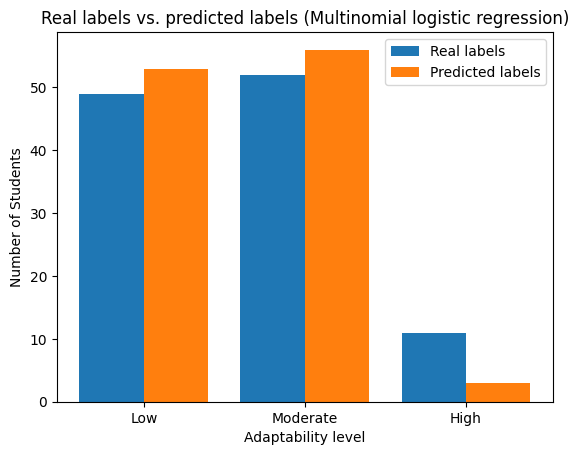

In [50]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

predicted_y_train_1 = model1.predict(X_train)
multi_accuracy_train_1 = accuracy_score(y_train, predicted_y_train_1)

predicted_y_val_1 = model1.predict(X_val)
multi_accuracy_val_1 = accuracy_score(y_val, predicted_y_val_1)

print("Accuracy scores\n")
print(f"Training data: {multi_accuracy_train_1:.5f}")
print(f"Validation data: {multi_accuracy_val_1:.5f}")

# visualize results of validation data
X_axis = np.arange(len(multi_labels)) 

real_labels_1 = y_val.value_counts(sort=False)
predicted_labels_1_pd = pd.Series(predicted_y_val_1).value_counts(sort=False)      # convert to pandas series

# reindex labels in multi_labels order
real_labels_1 = real_labels_1.reindex(multi_labels, fill_value=0)
predicted_labels_1_pd = predicted_labels_1_pd.reindex(multi_labels, fill_value=0)


plt.bar(X_axis - 0.2, real_labels_1, 0.4, label = 'Real labels')
plt.bar(X_axis + 0.2, predicted_labels_1_pd, 0.4, label = 'Predicted labels')

plt.xticks(X_axis, multi_labels) 
plt.xlabel("Adaptability level") 
plt.ylabel("Number of Students") 
plt.title("Real labels vs. predicted labels (Multinomial logistic regression)") 
plt.legend() 
plt.show()

The accuracy score results from using multinomial logistic regression are quite good, with accuracy scores being nearly identical and above 0.7. However, as observed from the plot, the model tends to assign data points belonging to the 'High' class to other classes. Despite this, the accuracy score appears good, likely because the 'High' class is relatively small in size.

<h3 style="font-size: 18px;">Decision Tree</h3>

The DecisionTreeClassifier() from Sklearn's tree module will be used as the model. Different depths of the tree will be tested, and the best one will be chosen based on the accuracy score. Often, a tree with too much depth leads to overfitting.

Accuracy scores

Training data: 0.71746
Validation data: 0.69643


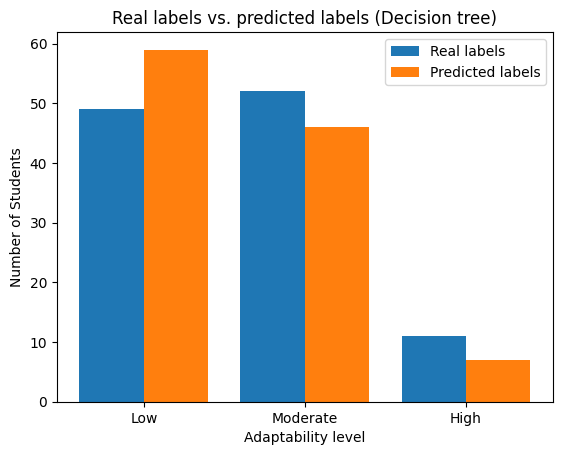

In [106]:
model2 = DecisionTreeClassifier(max_depth=6)
model2.fit(X_train, y_train)

predicted_y_train_2 = model2.predict(X_train)
multi_accuracy_train_2 = accuracy_score(y_train, predicted_y_train_2)

predicted_y_val_2 = model2.predict(X_val)
multi_accuracy_val_2 = accuracy_score(y_val, predicted_y_val_2)

print("Accuracy scores\n")
print(f"Training data: {multi_accuracy_train_2:.5f}")
print(f"Validation data: {multi_accuracy_val_2:.5f}")

# visualize results of validation data
predicted_labels_2_pd = pd.Series(predicted_y_val_2).value_counts(sort=False)      # convert to pandas series

# reindex labels in multi_labels order
predicted_labels_2_pd = predicted_labels_2_pd.reindex(multi_labels, fill_value=0)


plt.bar(X_axis - 0.2, real_labels_1, 0.4, label = 'Real labels')
plt.bar(X_axis + 0.2, predicted_labels_2_pd, 0.4, label = 'Predicted labels')

plt.xticks(X_axis, multi_labels) 
plt.xlabel("Adaptability level") 
plt.ylabel("Number of Students") 
plt.title("Real labels vs. predicted labels (Decision tree)") 
plt.legend() 
plt.show()

Setting the maximum depth to 6 produced the best results for the loss function. Additionally, the accuracy scores are satisfactory, with minimal difference between them and values around 0.7, which can be considered adequate.

<h3 style="font-size: 18px;">K-nearest neighbors</h3>

KNeighborsClassifier from Sklearn's neighbors module will be used as the model. The parameter n_neighbors specifies the number of nearest neighboring points to consider when classifying a data point. I will test different values for the n_neighbors parameter and select the best one based on the accuracy scores and the difference in accuracy between the training and validation sets. K-nearest neighbors is known for not performing well with data that has many features, but I will try it out.

Accuracy scores

Training data: 0.81980
Validation data: 0.76786


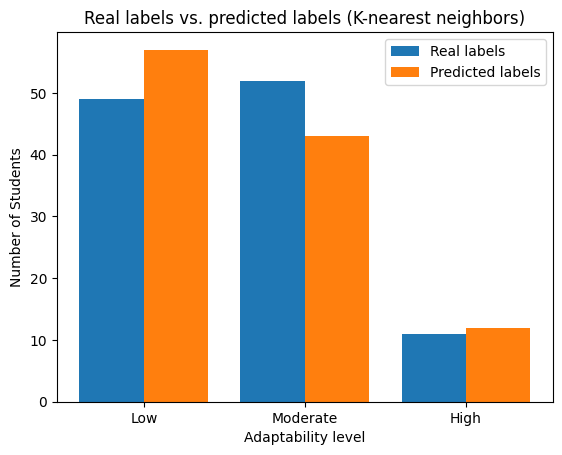

In [107]:
model3 = KNeighborsClassifier(n_neighbors = 8)
model3.fit(X_train, y_train)

predicted_y_train_3 = model3.predict(X_train)
multi_accuracy_train_3 = accuracy_score(y_train, predicted_y_train_3)

predicted_y_val_3 = model3.predict(X_val)
multi_accuracy_val_3 = accuracy_score(y_val, predicted_y_val_3)

print("Accuracy scores\n")
print(f"Training data: {multi_accuracy_train_3:.5f}")
print(f"Validation data: {multi_accuracy_val_3:.5f}")

# visualize results of validation data
predicted_labels_3_pd = pd.Series(predicted_y_val_3).value_counts(sort=False)      # convert to pandas series

# reindex labels in multi_labels order
predicted_labels_3_pd = predicted_labels_3_pd.reindex(multi_labels, fill_value=0)

plt.bar(X_axis - 0.2, real_labels_1, 0.4, label = 'Real labels')
plt.bar(X_axis + 0.2, predicted_labels_3_pd, 0.4, label = 'Predicted labels')

plt.xticks(X_axis, multi_labels) 
plt.xlabel("Adaptability level") 
plt.ylabel("Number of Students") 
plt.title("Real labels vs. predicted labels (K-nearest neighbors)") 
plt.legend() 
plt.show()

Setting the number of neighbors to 8 resulted in a good accuracy score for the validation data, with a small difference between the accuracy scores for training and validation. The value of the loss function is the smallest with 8 neighbor. There is no significant overfitting detected.

<h3 style="font-size: 20px;">Loss function</h3>

The loss function evaluates performance differently from accuracy. I will use cross-entropy loss, calculated using the log-loss function (cross-entropy loss and log loss are essentially the same), as it is well-suited for classification problems. Cross-entropy quantifies the difference between the probability distributions of the true and predicted labels. A smaller loss value indicates a better-performing model.

In [113]:
# encoding labels to use log loss function -> encoded labels: [0, 1, 2]
le = LabelEncoder()

# fit le
y_train_e = le.fit_transform(y_train)
y_val_e = le.transform(y_val)

predicted_y_prob_1 = model1.predict_proba(X_train)
loss_logistic_train_1 = log_loss(y_train_e, predicted_y_prob_1)

predicted_y_prob_1 = model1.predict_proba(X_val)
loss_logistic_val_1 = log_loss(y_val_e, predicted_y_prob_1)

print("Log losses\n")
print("Multinomial logistic regression")
print(f"Train: {loss_logistic_train_1:.5f}")
print(f"Validation: {loss_logistic_val_1:.5f}")

predicted_y_prob_2 = model2.predict_proba(X_train)
loss_logistic_train_2 = log_loss(y_train_e, predicted_y_prob_2)

predicted_y_prob_2 = model2.predict_proba(X_val)
loss_logistic_val_2 = log_loss(y_val_e, predicted_y_prob_2)

print("\nDecision tree")
print(f"Train: {loss_logistic_train_2:.5f}")
print(f"Validation: {loss_logistic_val_2:.5f}")

predicted_y_prob_3 = model3.predict_proba(X_train)
loss_logistic_train_3 = log_loss(y_train_e, predicted_y_prob_3)

predicted_y_prob_3 = model3.predict_proba(X_val)
loss_logistic_val_3 = log_loss(y_val_e, predicted_y_prob_3)

print("\nK-nearest neighbors")
print(f"Train: {loss_logistic_train_3:.5f}")
print(f"Validation: {loss_logistic_val_3:.5f}")

Log losses

Multinomial logistic regression
Train: 0.73742
Validation: 0.71108

Decision tree
Train: 0.55743
Validation: 0.52027

K-nearest neighbors
Train: 0.44599
Validation: 1.40482


All results combined:

<table>
    <tr>
        <th>Model</th>
        <th>Accuracy scores (train | validation)</th>
        <th>Log losses (train | validation)</th>
    </tr>
    <tr>
        <td>Multinomial logistic regression</td>
        <td>0.73860 | 0.71429</td>
        <td>0.73742 | 0.71108</td>
    </tr>
    <tr>
        <td>Decision tree</td>
        <td>0.71746 | 0.69643</td>
        <td>0.55743 | 0.52027</td>
    </tr>
    <tr>
        <td>K-nearest neighbors</td>
        <td>0.81980 | 0.76786</td>
        <td>0.44599 | 1.40482</td>
    </tr>
</table>

According to these statistics, all models achieved reasonably good accuracy scores. However, considering the loss function, the best model is the decision tree, as its value is significantly smaller than the others. K-nearest neighbors performed poorly in terms of the loss function, which might be due to its tendency to struggle with high-dimensional data. From the accuracy score plots, it is evident that multinomial logistic regression classified the 'High' group poorly, so it cannot be considered a good model.

<h3 style="font-size: 20px;">Use test data</h3>


Compute the accuracy score and loss function on the test dataset using the decision tree to confirm that the model performs well and is sufficient.

In [126]:
print("Accuracy score:")
predicted_y_test_2 = model2.predict(X_test)
multi_accuracy_test_2 = accuracy_score(y_test, predicted_y_test_2)
print(f"Testing data: {multi_accuracy_test_2:.5f}\n")

print("Log loss:")
y_test_e = le.transform(y_test)
predicted_y_prob_2 = model2.predict_proba(X_test)
loss_logistic_test_2 = log_loss(y_test_e, predicted_y_prob_2)
print(f"Testing data: {loss_logistic_test_2:.5f}")

Accuracy score:
Testing data: 0.76991

Log loss:
Testing data: 0.48680



The results are promising, with the accuracy score being higher and the log loss being lower compared to both the training and validation data. Based on these outcomes, the decision tree appears to be the best-performing model at this stage. A final confirmation will be made after further analysis and interpretation of the results.

<h3 style="font-size: 25px;">Visualize and analyze the results</h3>

Bar plots provide a good initial impression of the results but lack detail. Based on these results, we cannot precisely determine how the datapoints have been classified into different classes. To analyze the results more precisely, confusion matrices will be used for all three models. Since the dataset contains 12 features, creating visualizations can be challenging, but confusion matrices are an effective solution.

Confusion matrices show the correct predictions, false positives, and false negatives, which define precision and recall. In the context of adaptability levels in online education, precision and recall are not as significant, but in fields like medicine or law, they should be studied further. Nevertheless, I will examine the differences in precision and recall to see if they provide any interesting insights of certain group/groups.

<ul>
<li>Precision is calculated as: true positives / (true positives + false positives).

<li>Recall is calculated as: true positives / (true positives + false negatives).
</ul>

In a good model, both precision and recall should be close to 1.

I will use confusion_matrix() from Sklearn and heatmap() from Seaborn to plot the matrix and overlay the heatmap on it, respectively.

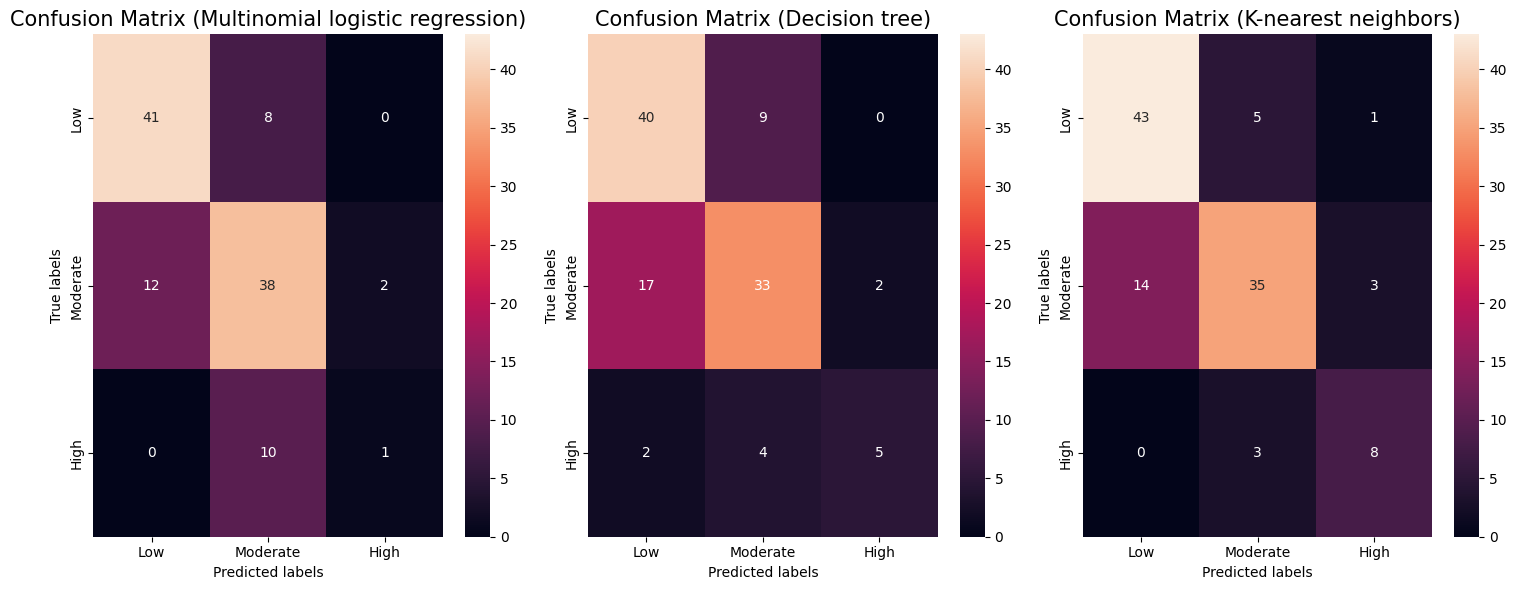

In [127]:
# Validation data is used
c_mat1 = confusion_matrix(y_val, predicted_y_val_1, labels=multi_labels)     
c_mat2 = confusion_matrix(y_val, predicted_y_val_2, labels=multi_labels)
c_mat3 = confusion_matrix(y_val, predicted_y_val_3, labels=multi_labels)

# Find the global min and max values to set consistent color scale across all subplots
vmin = min(c_mat1.min(), c_mat2.min(), c_mat3.min())
vmax = max(c_mat1.max(), c_mat2.max(), c_mat3.max())

# Set three plots visible
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Multinomial logistic regression
sns.heatmap(c_mat1, annot=True, fmt='g', ax=axes[0], vmin=vmin, vmax=vmax, xticklabels=multi_labels, yticklabels=multi_labels)
axes[0].set_xlabel('Predicted labels', fontsize=10)
axes[0].set_ylabel('True labels', fontsize=10)
axes[0].set_title('Confusion Matrix (Multinomial logistic regression)', fontsize=15)

# Decision tree
sns.heatmap(c_mat2, annot=True, fmt='g', ax=axes[1], vmin=vmin, vmax=vmax, xticklabels=multi_labels, yticklabels=multi_labels)
axes[1].set_xlabel('Predicted labels', fontsize=10)
axes[1].set_ylabel('True labels', fontsize=10)
axes[1].set_title('Confusion Matrix (Decision tree)', fontsize=15)

# K-nearest Neighbors
sns.heatmap(c_mat3, annot=True, fmt='g', ax=axes[2], vmin=vmin, vmax=vmax, xticklabels=multi_labels, yticklabels=multi_labels)
axes[2].set_xlabel('Predicted labels', fontsize=10)
axes[2].set_ylabel('True labels', fontsize=10)
axes[2].set_title('Confusion Matrix (K-nearest neighbors)', fontsize=15)

# show the plot
plt.tight_layout()
plt.show()


The confusion matrix should ideally have the highest possible values along its diagonal, indicating accurate predictions. Upon examination, we observe the following:
<ul>
<li>'Moderate' group: Some students are misclassified as belonging to the 'Low' group, and vice versa.
<li>'High' group: Since this group is relatively small, it is more difficult to interpret; however, there are cases where students from this group are misclassified as 'Moderate' and vice versa. 
<li>'Low' group: On a positive note, only few students from the 'Low' group are misclassified as 'High,' and similarly, no students from the 'High' group are misclassified as 'Low.'
</ul>

Multinomial logistic regression
Low
Precision: 0.77. Recall: 0.84.
Moderate
Precision: 0.68. Recall: 0.73.
High
Precision: 0.33. Recall: 0.09.
-------------------------------------
Decision tree
Low
Precision: 0.68. Recall: 0.82.
Moderate
Precision: 0.72. Recall: 0.63.
High
Precision: 0.71. Recall: 0.45.
-------------------------------------
K-nearest neighbors
Low
Precision: 0.75. Recall: 0.88.
Moderate
Precision: 0.81. Recall: 0.67.
High
Precision: 0.67. Recall: 0.73.
-------------------------------------


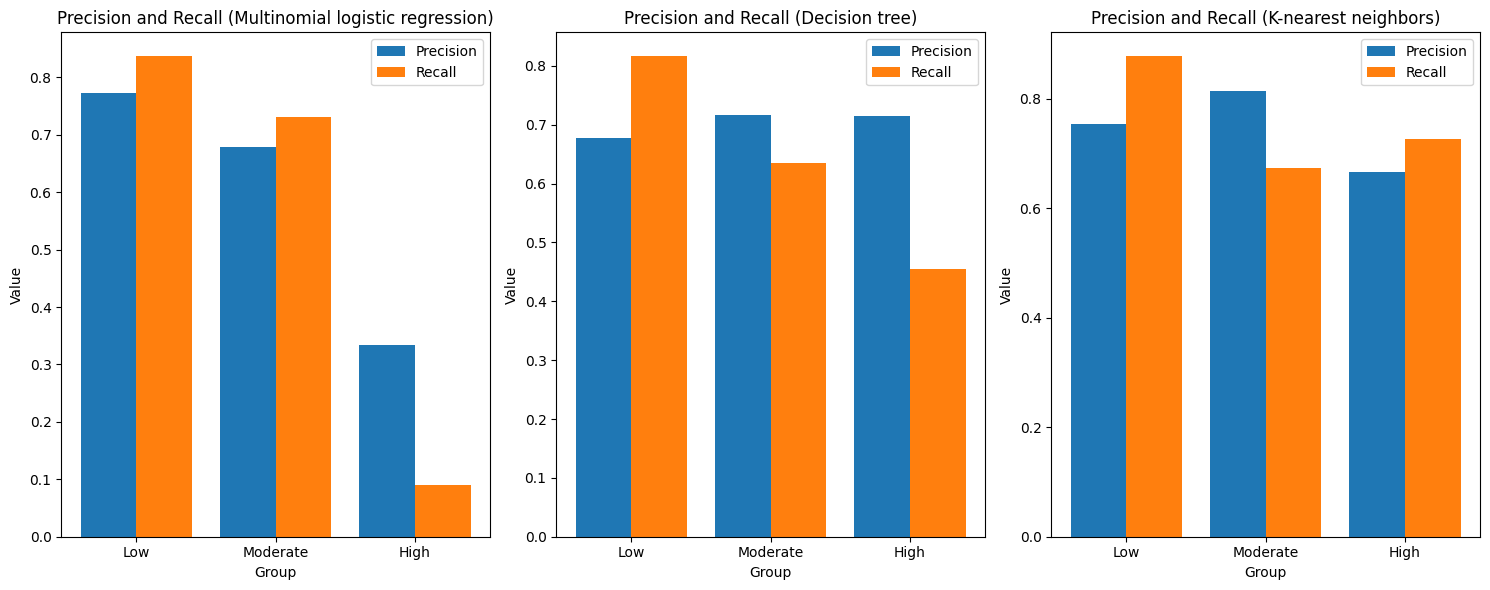

In [128]:
# compute precision and recall for each model

def precision_and_recall(matrix, index):
    true_positive = matrix[index][index]
    false_positive = 0
    false_negative = 0
    for i in range(3):
        if i != index:    
            false_positive += matrix[i][index]
            false_negative += matrix[index][i]
    return true_positive, false_positive, false_negative

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

precisions_all = []
recalls_all = []
for j in range(3):
    if j == 0:
        model = "Multinomial logistic regression"
        mat = c_mat1
    elif j == 1:
        model = "Decision tree"
        mat = c_mat2
    else:
        model = "K-nearest neighbors"
        mat = c_mat3

    print(model)
    precisions = []
    recalls = []
    for i in range(len(multi_labels)):
        tp, fp, fn = precision_and_recall(mat, i)
        print(multi_labels[i])
        if (tp + fp) > 0:
            precision = tp / (tp + fp) 
        else:
            precision = 0
        if (tp + fn) > 0:
            recall = tp / (tp + fn)
        else:
            recall = 0
        precisions.append(precision)
        recalls.append(recall)
        print(f"Precision: {precision:.2f}. Recall: {recall:.2f}.")
    precisions_all.append(precisions)
    recalls_all.append(recalls)
    print("-------------------------------------")

    axes[j].bar(X_axis - 0.2, precisions, 0.4, label='Precision')
    axes[j].bar(X_axis + 0.2, recalls, 0.4, label='Recall')
    axes[j].set_xticks(X_axis)
    axes[j].set_xticklabels(multi_labels)
    axes[j].set_xlabel("Group")
    axes[j].set_ylabel("Value")
    axes[j].set_title(f"Precision and Recall ({model})")
    axes[j].legend()

plt.tight_layout()
plt.show()


Precision and recall should ideally be as close to 1 as possible. Generally, low precision for a group indicates that the model has predicted students for this group who do not actually belong there. Conversely, low recall for a group suggests that the model has incorrectly classified students who belong to this group into other groups.

All models seem to have at least slightly lower precision and recall for the 'High' group. This is because the number of students in this group is significantly smaller compared to the other groups, meaning that one misclassified student—whether assigned to or from this group—can have a large impact on decreasing both precision and recall. (see the formulas for clarification). Therefore, the values are not fully comparable across all groups.

All models have lower precision than recall for the 'Low' group, and all models except for multinomial logistic regression have lower recall than precision for the 'Moderate' group. This suggests that all models, especially the decision tree and K-nearest neighbors, tend to assign students from the 'Moderate' group to the 'Low' group.

<ul>
<li>Multinomial logistic regression: There are students in the 'Low' and 'Moderate' groups who do not belong there, due to lower precision. The 'High' group has very low precision and recall, indicating that the model does not assign students to this group effectively.
<li>Decision tree: Both the 'Moderate' and 'High' groups have relatively low recall, while the 'Low' group has lower precision compared to recall. This suggests that too many students from other groups are being misclassified into the 'Low' group.
<li>K-nearest neighbors: While there are small differences in precision and recall, the values are generally quite good. However, some students from the 'Moderate' group are being misclassified into the 'Low' group.
</ul>

Details of these what number of students are predicted and belong to where can be seen from confusion matrix.

<h3 style="font-size: 25px;">Conclusion</h3>


Multinomial logistic regression performed decently, but its precision and recall were poor for the 'High' group. This did not significantly affect the accuracy score because the 'High' class is much smaller compared to the others, and the model performed worst for this class. The loss function gave a poor result, likely due to this. Perhaps this model would perform better if there were only two classes: 'Moderate' and 'Low'.

As a machine learning model for this particular problem, the best one is the decision tree with the maximum depth set to 6. This works well for this small dataset, but since a depth of 6 is quite large, it might cause overfitting when more data is added. In that case, the model should be updated. But for now, and for this dataset, this model was the best. The accuracy was acceptable for this model, and the log loss was significantly better than for the other models.

K-nearest neighbors with 8 neighbors did not seem so bad, but its log loss was very high. This may be because K-nearest neighbors often do not perform well with data that has many features. This is related to the curse of dimensionality, where the volume of the space increases, focusing more on the center as the dimensions increase. This model is more geometric than the decision tree, which is more directly affected by the dimensions.

Overall, determining the best machine learning model is not straightforward, especially when the dataset is small. The varying class sizes, such as the 'High' class being much smaller than the others, also affect the results. Both accuracy score and log loss should be taken into account when selecting the best model, as this project demonstrates that they do not fully correlate.